In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('india_credit_data.csv')

In [19]:
# rename columns so they aren't ugly :)

df.columns = ['id', 'income', 'age', 'experience', 'marriage_status',
              'house_ownership', 'car_ownership', 'profession', 'city', 'state',
              'current_job_yrs', 'current_house_yrs', 'default']

In [4]:
# regularize numerical fields

std = StandardScaler()
std.fit(df[['income','age','experience','current_job_yrs','current_house_yrs']])

df[['income','age','experience','current_job_yrs','current_house_yrs']] = std.transform(df[['income','age','experience','current_job_yrs','current_house_yrs']].values)
df

,id,income,age,experience,marriage_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,default
0,1,-1.283145,-1.579604,-1.180232,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356,0
1,2,0.895457,-0.583344,-0.014067,single,rented,no,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356,0
2,3,-0.349269,0.940348,-1.013637,married,rented,no,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981,0
3,4,0.437526,-0.524740,-1.346827,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577,1
4,5,0.268128,-0.173119,0.152528,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,-0.914131,1.431135,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,1.097092,-0.407533,0.485719,single,rented,no,Surgeon,Kolkata,West_Bengal,-0.091547,-0.713202,0
251996,251997,-0.748199,-1.403793,-0.014067,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,-0.091547,-0.713202,0
251997,251998,-0.164913,-0.231723,-0.513852,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,0.182647,0.001577,0
251998,251999,0.524618,-0.290326,-1.680018,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,-1.736714,-1.427981,0


In [5]:
len(df.city.unique())

317

In [6]:
# drop id and city, state should be enough of a signal and there are too many cities for this first pass

df.drop(columns=['id','city'],axis=1,inplace=True)
df

,income,age,experience,marriage_status,house_ownership,car_ownership,profession,state,current_job_yrs,current_house_yrs,default
0,-1.283145,-1.579604,-1.180232,single,rented,no,Mechanical_engineer,Madhya_Pradesh,-0.914131,0.716356,0
1,0.895457,-0.583344,-0.014067,single,rented,no,Software_Developer,Maharashtra,0.731036,0.716356,0
2,-0.349269,0.940348,-1.013637,married,rented,no,Technical_writer,Kerala,-0.639936,-1.427981,0
3,0.437526,-0.524740,-1.346827,single,rented,yes,Software_Developer,Odisha,-1.188325,0.001577,1
4,0.268128,-0.173119,0.152528,single,rented,no,Civil_servant,Tamil_Nadu,-0.914131,1.431135,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,1.097092,-0.407533,0.485719,single,rented,no,Surgeon,West_Bengal,-0.091547,-0.713202,0
251996,-0.748199,-1.403793,-0.014067,single,rented,no,Army_officer,Madhya_Pradesh,-0.091547,-0.713202,0
251997,-0.164913,-0.231723,-0.513852,single,rented,no,Design_Engineer,Maharashtra,0.182647,0.001577,0
251998,0.524618,-0.290326,-1.680018,single,rented,no,Graphic_Designer,Puducherry,-1.736714,-1.427981,0


In [7]:
df.state.value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64

In [8]:
# clean state names, Uttar Pradesh was duplicated

df.state.replace({'Uttar_Pradesh[5]':'Uttar_Pradesh'},inplace=True)
df.state.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Manipur', 'Sikkim'], dtype=object)

In [9]:
df

,income,age,experience,marriage_status,house_ownership,car_ownership,profession,state,current_job_yrs,current_house_yrs,default
0,-1.283145,-1.579604,-1.180232,single,rented,no,Mechanical_engineer,Madhya_Pradesh,-0.914131,0.716356,0
1,0.895457,-0.583344,-0.014067,single,rented,no,Software_Developer,Maharashtra,0.731036,0.716356,0
2,-0.349269,0.940348,-1.013637,married,rented,no,Technical_writer,Kerala,-0.639936,-1.427981,0
3,0.437526,-0.524740,-1.346827,single,rented,yes,Software_Developer,Odisha,-1.188325,0.001577,1
4,0.268128,-0.173119,0.152528,single,rented,no,Civil_servant,Tamil_Nadu,-0.914131,1.431135,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,1.097092,-0.407533,0.485719,single,rented,no,Surgeon,West_Bengal,-0.091547,-0.713202,0
251996,-0.748199,-1.403793,-0.014067,single,rented,no,Army_officer,Madhya_Pradesh,-0.091547,-0.713202,0
251997,-0.164913,-0.231723,-0.513852,single,rented,no,Design_Engineer,Maharashtra,0.182647,0.001577,0
251998,0.524618,-0.290326,-1.680018,single,rented,no,Graphic_Designer,Puducherry,-1.736714,-1.427981,0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

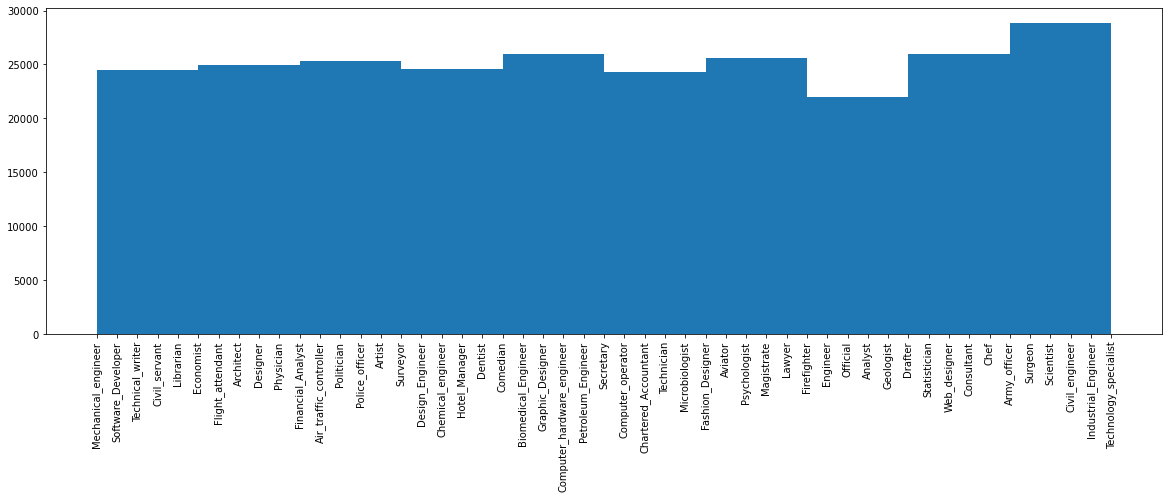

In [10]:
plt.figure(figsize=(20,6))
plt.hist(df.profession)
plt.xticks(rotation=90)

In [20]:
def count_plots(df):
    """
    Give value count plots for all features in a dataframe
    """
    
   
    # instantiate the subplot
    
    plot_num = len(df.columns)
    rows = m.ceil(len(df.columns)/3)
    alloc_axes = rows * 3
    unused_plots = alloc_axes - plot_num
    
    fig, axs = plt.subplots(nrows=rows,ncols=3,squeeze=False)
    fig.set_size_inches(24,6*rows)
    fig.tight_layout()
    
    # loop through columns of df and plot each subplot
    
    column_counter = 0
    row_counter = 0
    
    for var in df.columns:
        sns.barplot(x=df[var].value_counts().index,
                    y=df[var].value_counts().values,
                    ax=axs[row_counter,column_counter],
                    color='blue')
        
#         axs[row_counter,column_counter].title.set_text(var)
        axs[row_counter,column_counter].set_xticklabels(axs[row_counter,column_counter].get_xticklabels(),rotation=90)
        axs[row_counter,column_counter].set_title(var+' val count ', y=.975, pad=-14, weight='bold', loc='right',fontsize=16)
        
        
        if column_counter == 2 and row_counter < rows:
            row_counter+=1        
        if column_counter < 2:
            column_counter+=1
        else:
            column_counter=0
    
    # hide any unused subplots
    
    if unused_plots > 1:
        axs[-1,-1].axis('off')
        axs[-1,-2].axis('off')
    elif unused_plots==1:
        axs[-1,-1].axis('off')
        
    plt.tight_layout()

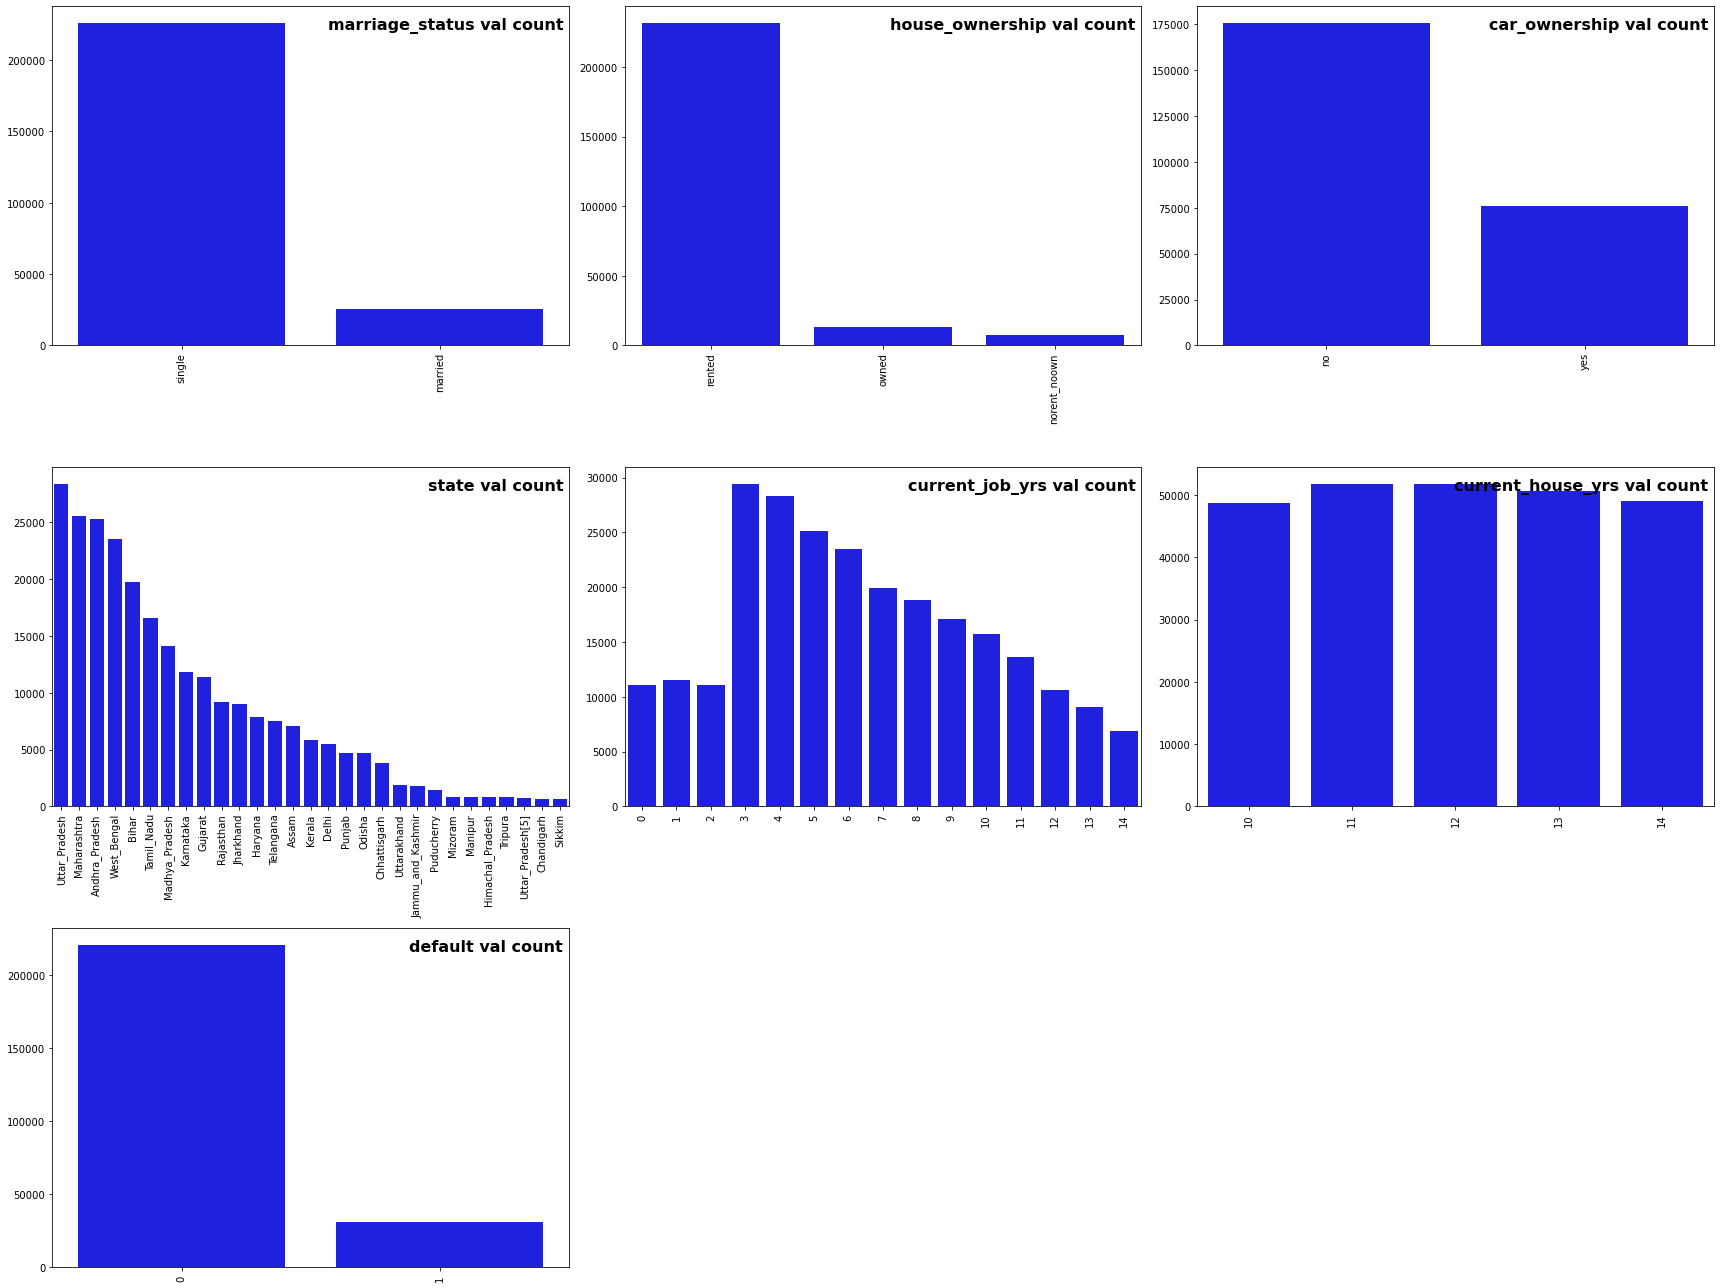

In [21]:
count_plots(df[['marriage_status','house_ownership','car_ownership','state','current_job_yrs','current_house_yrs','default']])

In [13]:
# dummify categoricals

dummy_df = pd.get_dummies(df[['marriage_status','house_ownership','car_ownership','profession','state']],drop_first=True)
dummy_df = pd.concat([df,dummy_df],axis=1)
dummy_df.drop(columns=['marriage_status','house_ownership','car_ownership','profession','state'],inplace=True)
dummy_df

,income,age,experience,current_job_yrs,current_house_yrs,default,marriage_status_single,house_ownership_owned,house_ownership_rented,car_ownership_yes,...,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttarakhand,state_West_Bengal
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.895457,-0.583344,-0.014067,0.731036,0.716356,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.268128,-0.173119,0.152528,-0.914131,1.431135,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,1.097092,-0.407533,0.485719,-0.091547,-0.713202,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
251996,-0.748199,-1.403793,-0.014067,-0.091547,-0.713202,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
251997,-0.164913,-0.231723,-0.513852,0.182647,0.001577,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
251998,0.524618,-0.290326,-1.680018,-1.736714,-1.427981,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
# quick look at corrs of dummy set

dummy_df.corr()['default'].reset_index().sort_values('default',ascending=False).head(87)

,index,default
5,default,1.000000
8,house_ownership_rented,0.026647
72,state_Madhya_Pradesh,0.023271
6,marriage_status_single,0.021092
71,state_Kerala,0.020617
...,...,...
58,profession_Technology_specialist,-0.017495
1,age,-0.021809
7,house_ownership_owned,-0.023499
9,car_ownership_yes,-0.024036


In [15]:
dummy_df.columns

Index(['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs',
       'default', 'marriage_status_single', 'house_ownership_owned',
       'house_ownership_rented', 'car_ownership_yes', 'profession_Analyst',
       'profession_Architect', 'profession_Army_officer', 'profession_Artist',
       'profession_Aviator', 'profession_Biomedical_Engineer',
       'profession_Chartered_Accountant', 'profession_Chef',
       'profession_Chemical_engineer', 'profession_Civil_engineer',
       'profession_Civil_servant', 'profession_Comedian',
       'profession_Computer_hardware_engineer', 'profession_Computer_operator',
       'profession_Consultant', 'profession_Dentist',
       'profession_Design_Engineer', 'profession_Designer',
       'profession_Drafter', 'profession_Economist', 'profession_Engineer',
       'profession_Fashion_Designer', 'profession_Financial_Analyst',
       'profession_Firefighter', 'profession_Flight_attendant',
       'profession_Geologist', 'profession_G

In [16]:
# reorder columns

dummy_df = dummy_df[['default','income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs',
        'marriage_status_single', 'house_ownership_owned',
        'house_ownership_rented', 'car_ownership_yes', 'profession_Analyst',
        'profession_Architect', 'profession_Army_officer', 'profession_Artist',
        'profession_Aviator', 'profession_Biomedical_Engineer',
        'profession_Chartered_Accountant', 'profession_Chef',
        'profession_Chemical_engineer', 'profession_Civil_engineer',
        'profession_Civil_servant', 'profession_Comedian',
        'profession_Computer_hardware_engineer', 'profession_Computer_operator',
        'profession_Consultant', 'profession_Dentist',
        'profession_Design_Engineer', 'profession_Designer',
        'profession_Drafter', 'profession_Economist', 'profession_Engineer',
        'profession_Fashion_Designer', 'profession_Financial_Analyst',
        'profession_Firefighter', 'profession_Flight_attendant',
        'profession_Geologist', 'profession_Graphic_Designer',
        'profession_Hotel_Manager', 'profession_Industrial_Engineer',
        'profession_Lawyer', 'profession_Librarian', 'profession_Magistrate',
        'profession_Mechanical_engineer', 'profession_Microbiologist',
        'profession_Official', 'profession_Petroleum_Engineer',
        'profession_Physician', 'profession_Police_officer',
        'profession_Politician', 'profession_Psychologist',
        'profession_Scientist', 'profession_Secretary',
        'profession_Software_Developer', 'profession_Statistician',
        'profession_Surgeon', 'profession_Surveyor',
        'profession_Technical_writer', 'profession_Technician',
        'profession_Technology_specialist', 'profession_Web_designer',
        'state_Assam', 'state_Bihar', 'state_Chandigarh', 'state_Chhattisgarh',
        'state_Delhi', 'state_Gujarat', 'state_Haryana',
        'state_Himachal_Pradesh', 'state_Jammu_and_Kashmir', 'state_Jharkhand',
        'state_Karnataka', 'state_Kerala', 'state_Madhya_Pradesh',
        'state_Maharashtra', 'state_Manipur', 'state_Mizoram', 'state_Odisha',
        'state_Puducherry', 'state_Punjab', 'state_Rajasthan', 'state_Sikkim',
        'state_Tamil_Nadu', 'state_Telangana', 'state_Tripura',
        'state_Uttar_Pradesh', 'state_Uttarakhand', 'state_West_Bengal']]


df = df[['default', 'income', 'age', 'experience', 'marriage_status', 'house_ownership',
       'car_ownership', 'profession', 'state', 'current_job_yrs',
       'current_house_yrs']]

In [17]:
df.to_csv('clean_india_credit_data.csv',index=False)
dummy_df.to_csv('clean_india_credit_data_dummy.csv',index=False)